Imports and Initializations

In [1]:
!cd
!C:\EnergyPlusV9-6-0\EnergyPlus -v
!C:\EnergyPlusV9-6-0\EnergyPlus -h
import os
import opyplus as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
eplus_dir_path = op.get_eplus_base_dir_path((9, 6, 0))

C:\Users\chmat\Desktop\THESIS
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.05 19:42
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.05 19:42
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                   

 Running EP Baseline Simulation

In [48]:
idf_path = "C:\\Users\\chmat\\Documents\\GenOpt\\3\\backup\\REFBLDG3.idf"
epw_path = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")

PricePerKwh = pd.read_excel (r'C:\\Users\\chmat\\Desktop\\THESIS\\Optimization Files\\TimeofDayPricing - Copy.xlsx')

In [49]:
print(idf_path)

C:\Users\chmat\Documents\GenOpt\3\backup\REFBLDG3.idf


In [50]:
# # run simulation

s = op.simulate(idf_path, epw_path, "Baseline")
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (Baseline)


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.05 19:52,
   ** Warning ** For Schedule:File="CLOTHES_DRYER_EXHAUST", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** CalculateZoneVolume: 1 zone is not fully enclosed. For more details use:  Output:Diagnostics,DisplayExtrawarnings; 
   ** Warning ** CheckUsedConstructions: There are 1 nominally unused constructions in input.
   **   ~~~   ** For explicit details on each unused construction, use Output:Diagnostics,DisplayExtraWarnings;
   ** Warning ** Check input. Pump nominal power or motor efficiency is set to 0, for pump=PUMP VARIABLE SPEED 1
   ************* Testing Individual Branch Integrity
   ************* All Branches passed integrity testing
   ************* Testing Individual Supply Air Path Integrit

In [51]:
# eso = s.get_out_eso()
# print(eso.get_info())

In [52]:
# # retrieve hourly output (.eso file)
# hourly_output = s.get_out_eso()
# # get Pandas dataframe
# #df = hourly_output.get_data('denver-aurora-buckley.afb_co_usa ann htg 99.6% condns db')
# df = hourly_output.get_data('run period')

In [53]:
df = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\3\\backup\\REFBLDG3.csv')

In [54]:
df2 = df[0:24]
df2

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),FINISHED BASEMENT ZONE:Zone Mean Air Temperature [C](Hourly),LIVING ZONE:Zone Mean Air Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly),FINISHED BASEMENT ZONE:Zone Air Temperature [C](Hourly),FINISHED BASEMENT ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),LIVING ZONE:Zone Air Temperature [C](Hourly),LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Air Temperature [C](Hourly),UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:NaturalGas [J](Hourly)
0,01/01 01:00:00,-4.500,23.794336,18.888889,-6.085706,23.794336,21.5,18.888889,18.888889,-6.085706,0.0,1.831144e+07
1,01/01 02:00:00,-3.000,23.569398,18.888889,-5.696776,23.569398,21.5,18.888889,18.888889,-5.696776,0.0,1.641649e+07
2,01/01 03:00:00,-3.625,23.633072,18.888889,-5.516550,23.633072,21.5,18.888889,18.888889,-5.516550,0.0,1.756429e+07
3,01/01 04:00:00,-2.750,23.565564,18.888889,-5.264549,23.565564,21.5,18.888889,18.888889,-5.264549,0.0,1.705434e+07
4,01/01 05:00:00,-2.000,23.518091,18.888889,-4.411223,23.518091,21.5,18.888889,18.888889,-4.411223,0.0,1.732271e+07
5,01/01 06:00:00,-1.375,23.218450,18.888889,-3.665690,23.218450,21.5,18.888889,18.888889,-3.665690,0.0,1.434477e+07
6,01/01 07:00:00,-1.000,23.273129,18.888889,-3.174703,23.273129,21.5,18.888889,18.888889,-3.174703,0.0,1.586497e+07
7,01/01 08:00:00,-1.000,23.885651,21.632302,-2.597312,23.885651,21.5,21.632302,21.666667,-2.597312,0.0,2.465288e+07
8,01/01 09:00:00,-0.375,23.888810,21.666691,-0.498591,23.888810,21.5,21.666691,21.666667,-0.498591,0.0,2.088257e+07
9,01/01 10:00:00,1.250,23.874278,21.666708,2.301649,23.874278,21.5,21.666708,21.666667,2.301649,0.0,1.905517e+07


In [55]:
df2.keys()

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'FINISHED BASEMENT ZONE:Zone Mean Air Temperature [C](Hourly)',
       'LIVING ZONE:Zone Mean Air Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Mean Air Temperature [C](Hourly)',
       'FINISHED BASEMENT ZONE:Zone Air Temperature [C](Hourly)',
       'FINISHED BASEMENT ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'LIVING ZONE:Zone Air Temperature [C](Hourly)',
       'LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Air Temperature [C](Hourly)',
       'UNFINISHED ATTIC ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:NaturalGas [J](Hourly) '],
      dtype='object')

In [45]:
#print((df['bgwall_upper_ldf,Surface Outside Face Convection Heat Transfer Coefficient'][1:48]))
#print(df['environment,Site Outdoor Air Drybulb Temperature'][0:23])

In [56]:
##Zone Temperature ###

ZoneT = df2[["LIVING ZONE:Zone Air Temperature [C](Hourly)"]]
OutsideT = df2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating = df2["Heating:NaturalGas [J](Hourly) "]
Setpoint = df2["LIVING ZONE:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]
#Notmet = sum (df["living_unit1,Zone Heating Setpoint Not Met While Occupied Time"])
#PeopleE= df['living_unit1,Zone People Total Heating Energy']
# monthly resample and display
# print(df[[
#     "living_unit1,Zone Mean Air Temperature",
# ]])
print(Heating)

0     1.831144e+07
1     1.641649e+07
2     1.756429e+07
3     1.705434e+07
4     1.732271e+07
5     1.434477e+07
6     1.586497e+07
7     2.465288e+07
8     2.088257e+07
9     1.905517e+07
10    1.817647e+07
11    2.144574e+07
12    1.988404e+07
13    2.087862e+07
14    2.280058e+07
15    1.988311e+07
16    2.161962e+07
17    2.125661e+07
18    2.207147e+07
19    2.593395e+07
20    2.797638e+07
21    2.416456e+07
22    2.005988e+07
23    2.506462e+07
Name: Heating:NaturalGas [J](Hourly) , dtype: float64


In [57]:
hours =24

In [59]:
print( str(sum (Heating[0:hours]/1000000000)) + 'GJ')
print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')

0.4926853021748742GJ
136.85702838190952kWh


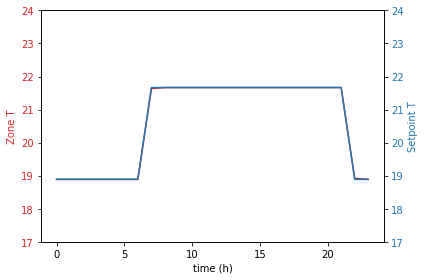

In [60]:
# Create som mock data
t = np.arange(0, hours, 1)
data1 = ZoneT[0:hours]
data2 = Setpoint[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


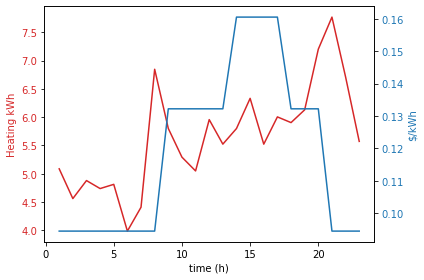

In [61]:
# Create some mock data
t = np.arange(1, hours, 1)
data1 = Heating[0:hours-1]/3.6E6 ##J to kWh
data2 = PricePerKwh[0:hours-1]*3.4E6

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [65]:
### Total Price for Time Period
#TotPrice = np.vdot(PricePerKwh[1:hours], Heating[1:hours])

PriceArray = 0.02696 *Heating[1:hours]/3.6E6
TotPrice= sum(PriceArray) + 16.20/31
print(TotPrice)

4.07511381264166


In [63]:
# # Create some mock data
# t = np.arange(0, hours, 1)
# data1 = Heating[0:hours]/3.6e6
# data2 = PricePerKwh[0:hours]

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# title = "Temperature and Prices"
# ax1.set_xlabel('time (h)')
# ax1.set_ylabel('Heating kWh', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [64]:
idf_path2 = 'C:\\Users\\chmat\\Documents\\GenOpt\\1\\tmp-genopt-run-204\\output.expidf'
epw_path2 = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")


In [98]:
print(idf_path2)

C:\Users\chmat\Documents\GenOpt\1\tmp-genopt-run-204\output.expidf


In [86]:
# # run simulation
s2 = op.simulate(idf_path2, epw_path2, "Optimized")
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (Optimized)


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.03.17 15:53,
   ** Warning ** Output:PreprocessorMessage="GroundTempCalc - Slab" has the following Warning condition:
   **   ~~~   ** Slab thickness [0.100 m] reset to 0.122 m  for computational stability.
   ** Warning ** Timestep: Requested number (2) is less than the suggested minimum of 4.
   **   ~~~   ** Please see entry for Timestep in Input/Output Reference for discussion of considerations.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** GetHTSurfaceData: Surfaces with interface to Ground found but no "Ground Temperatures" were input.
   **   ~~~   ** Found first in surface=BGWALL_LOWER_LDF
   **   ~~~   ** Defaults, constant throughout the year of (18.0) will be used.
   ** Warning ** CalculateZoneVolume: 1 zone is not fully enclosed. For more details use:  Output:Diagnostics,DisplayExtrawarnings; 
   ** Warning ** CheckUsedConstructions: There are 12 nominal

In [87]:
# retrieve hourly output (.eso file)
hourly_output2 = s2.get_out_eso()

# ask for datetime index on year #2013?
hourly_output2.create_datetime_index(2021)

# get Pandas dataframe
df2 = hourly_output2.get_data()
print(hourly_output.get_info())

Standard output
  environments
    denver-aurora-buckley.afb_co_usa ann htg 99.6% condns db (0)
      latitude: 39.72
      longitude: -104.75
      timezone_offset: -7.0
      elevation: 1726.0
    denver-aurora-buckley.afb_co_usa ann clg .4% condns db=>mwb (1)
      latitude: 39.72
      longitude: -104.75
      timezone_offset: -7.0
      elevation: 1726.0
    monthly (2)
      latitude: 39.72
      longitude: -104.75
      timezone_offset: -7.0
      elevation: 1726.0
  variables
    hourly
      environment,Site Outdoor Air Drybulb Temperature (7)
      living_unit1,Zone Total Internal Convective Heating Energy (8)
      living_unit1,Zone Total Internal Convective Heating Rate (9)
      attic_unit1,Zone Total Internal Convective Heating Energy (10)
      attic_unit1,Zone Total Internal Convective Heating Rate (11)
      crawlspace_unit1,Zone Total Internal Convective Heating Energy (12)
      crawlspace_unit1,Zone Total Internal Convective Heating Rate (13)
      living_unit1,Zone

In [60]:
##Zone Temperature ###
ZoneT2 = df2[["living_unit1,Zone Mean Air Temperature"]]
OutsideT2 = df2["environment,Site Outdoor Air Drybulb Temperature"]
Heating2 = df2["heating:electricity,Meter"]
Setpoint2 = df2["living_unit1,Zone Thermostat Heating Setpoint Temperature"]
Notmet2 = sum (df2["living_unit1,Zone Heating Setpoint Not Met While Occupied Time"])
PeopleE2= df2['living_unit1,Zone People Total Heating Energy']
# monthly resample and display
# print(df[[
#     "living_unit1,Zone Mean Air Temperature",
# ]])

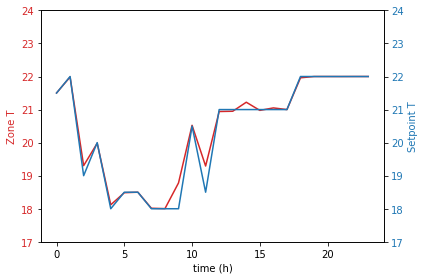

In [99]:
# Create som mock data
hours = 24
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


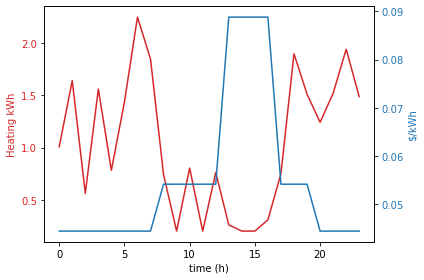

In [100]:
# Create some mock data
t = np.arange(0, hours, 1)
data1 = Heating2[0:hours]/3.6e6
data2 = PricePerKwh[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [101]:
TotPrice2 = np.vdot(PricePerKwh[1:hours], Heating2[1:hours]/3.6e6)
print("MINIMUM PRICE $ " + str(TotPrice2))
print("BASELINE PRICE $ " + str(TotPrice))


MINIMUM PRICE $ 1.179813161296272
BASELINE PRICE $ 1.4620028144442179


In [102]:
#Energy Comparison
print (sum(Heating[0:hours])/3.6e6)
print (sum(Heating2[0:hours])/3.6e6)

31.841632239943763
25.106863890275935


# RATING ANOTHER SCHEDULE

In [151]:
#Schedule Rating
MaxP = TotPrice
MinP = TotPrice2
DayPrice = 1.2
PriceRating = (1-(DayPrice-MinP)/(MaxP-MinP))*5
if (PriceRating > 5):
    PriceRating=5
    
print(PriceRating)

##Comfort Rating
## Preffered point not met while occupied 
PrefT = 21
count =0

for i in range (23):
    T = ZoneT2['living_unit1,Zone Mean Air Temperature'][i]
    if (i <7 or i>17):
        if ((T-PrefT)> 1.25):
            count = count+1
print(count)  

TRating = (1-(count/24))*5
if (TRating > 5):
    TRating=5
    
print(TRating)

4.642317879508776
0
5.0


In [153]:
Rating = 0.5*PriceRating + 0.5*TRating
print('RATING:' +str(Rating))

RATING:4.821158939754389


TEST BELOW

Add Constraints

In [ ]:
# s = op.simulate(idf_path, epw_path, "Baseline")
# print(f"status: {s.get_status()}\n")
# print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

ZoneT = df[["living_unit1,Zone Mean Air Temperature"]][1:hours]
Heating = df["heating:electricity,Meter"][1:hours]
print(ZoneT['living_unit1,Zone Mean Air Temperature'][9])

In [ ]:
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] <= 24.0 for i in range(hours)), name='T_max')
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] >= 18.0 for i in range(hours)), name='T_min')

##Maybe the setpoint can be higher... as long as the actual temperature is within comfort

In [ ]:

Cost = PricePerKwh.values.flatten()
a = Cost[0:hours]
A = sp.diags(a)

In [ ]:


# Solve
model.optimize()
printSolution()


In [ ]:
 # plotting the points
Opt_T = model.printAttr('T_Setpoints')
t = np.arange(1, hours, 1)
print(Opt_T[1])
# plt.plot(t,t)

In [ ]:
##Convert J to kWh
Heating = Heating / 3.6E6

In [ ]:
# Create some mock data
t = np.arange(1, 24*30, 1)
data1 = Heating[1:24*30]
data2 = ZoneT[1:24*30]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating Elec (Kwh)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ZoneT', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
## Just January to Test ####
## Elec Heating
plt.plot(ZoneT[1:24*60])
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Heating Electricity (kWh)')
 
# giving a title to my graph
plt.title('Zone Temperature')